In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

warnings.filterwarnings("ignore")

# Load data
csv_features = "./Dataset/acsincome_ca_features.csv"
csv_labels = "./Dataset/acsincome_ca_labels.csv"
features = pd.read_csv(csv_features)
labels = pd.read_csv(csv_labels)

# Separating features and labels, shuffling
X_all = features
Y_all = labels
X_all,Y_all = shuffle(X_all,Y_all, random_state=0)

# Only use first N samples to limit training time
sample = 0.05
num_samples = int(len(X_all)*sample)
X,Y = X_all[:num_samples], Y_all[:num_samples]

# Scaler for data standardization
scaler = StandardScaler()

# Separate train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0, train_size=0.8)
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)

On ne standardize que les sets de feature, les labels (Y) correspondant à des booléens n'ont pas besoin d'être standardisés.

# SVM

In [2]:
# Creation d'une instance de SVM
SVM_model = SVC()

# Test avec default parameters
SVM_model.fit(X_train, Y_train)
print("Model score on test dataset: ", SVM_model.score(X_test,Y_test))
print("Model score on train dataset:", SVM_model.score(X_train,Y_train))

Model score on test dataset:  0.795094532447624
Model score on train dataset: 0.813953488372093


Default model score with 1% : 0.7755

with 10% : 0.7969

with 20% : 0.8044

with 50% : 0.8058

In [3]:
score = cross_val_score(SVC(), X_train, Y_train, cv=5).mean()

print(score)

0.7998978288633461


Score moyen obtenu par cross validation du modèle avec les paramètres défauts : 0.7999

## 1. Recherche de paramètres

Default parameters :
- C = 1
- kernel = rbf
- gamma = scale

### C

Score pour le paramètre C 1 :  0.7998978288633461
Score pour le paramètre C 2 :  0.7955532705780585
Score pour le paramètre C 3 :  0.7954253118382235
Score pour le paramètre C 4 :  0.7935079708991795


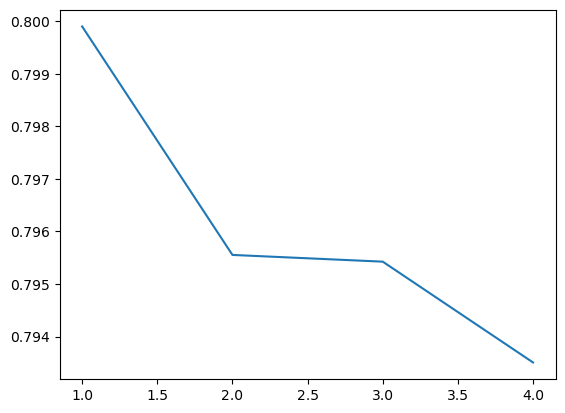

In [9]:
# Cross validation avec variation de C
# train_score,val_score = validation_curve(SVM_model, X_train, Y_train,'C', k, cv=5)
tab = [1, 2, 3, 4] 
val_score = []
for c in tab:
    score = cross_val_score(SVC(C=c), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre C", c, ": ",score)
    val_score.append(score)
plt.plot(tab, val_score)

# print(val_score.mean())

La configuration optimale semble être avec un C aux alentours de 1 pour 10% du dataset.

### Kernel

Score pour le paramètre Kernel rbf :  0.7998978288633461
Score pour le paramètre Kernel linear :  0.7857125253489692
Score pour le paramètre Kernel poly :  0.7836687761905343
Score pour le paramètre Kernel sigmoid :  0.7196530098458049


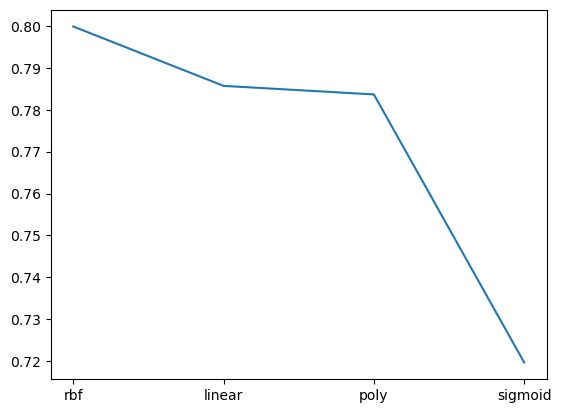

In [10]:
tab =['rbf', 'linear', 'poly', 'sigmoid'] 
val_score = []
for k in tab:
    score = cross_val_score(SVC(kernel=k), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre Kernel", k, ": ",score)
    val_score.append(score)

plt.plot(tab, val_score)

La meilleure configuration semble être avec un kernel en 'rbf'

### Gamma : 

Score pour le paramètre gamma scale :  0.7998978288633461
Score pour le paramètre gamma auto :  0.8000255427841635
Score pour le paramètre gamma 0.01 :  0.792486014713623
Score pour le paramètre gamma 0.05 :  0.7992585248022066
Score pour le paramètre gamma 0.07 :  0.7988756278587721
Score pour le paramètre gamma 0.09 :  0.8001531750986416
Score pour le paramètre gamma 0.1 :  0.8000255427841635
Score pour le paramètre gamma 0.11 :  0.7986200368044589
Score pour le paramètre gamma 0.13 :  0.7981086914831544
Score pour le paramètre gamma 0.15 :  0.7974699586663891
Score pour le paramètre gamma 0.5 :  0.7883980267587186
Score pour le paramètre gamma 1.0 :  0.7780476499414475
Score pour le paramètre gamma 2.0 :  0.7454642788651824


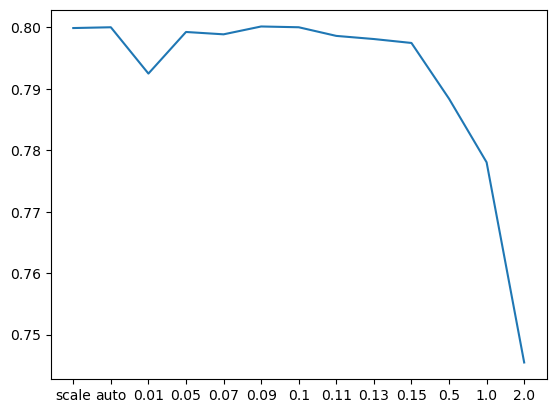

In [11]:
val_score = []
tab =['scale','auto', 0.01, 0.05, 0.07, 0.09, 0.1, 0.11, 0.13, 0.15, 0.5, 1.0, 2.0] 
for g in tab:
    score = cross_val_score(SVC(gamma=g), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre gamma", g, ": ",score)
    val_score.append(score)

plt.plot(tab, val_score)


Score pour le paramètre gamma scale :  0.7998978288633461
Score pour le paramètre gamma auto :  0.8000255427841635
Score pour le paramètre gamma 0.07 :  0.7988756278587721
Score pour le paramètre gamma 0.09 :  0.8001531750986416
Score pour le paramètre gamma 0.093 :  0.7998975840443285
Score pour le paramètre gamma 0.097 :  0.8000255427841635
Score pour le paramètre gamma 0.1 :  0.8000255427841635
Score pour le paramètre gamma 0.11 :  0.7986200368044589


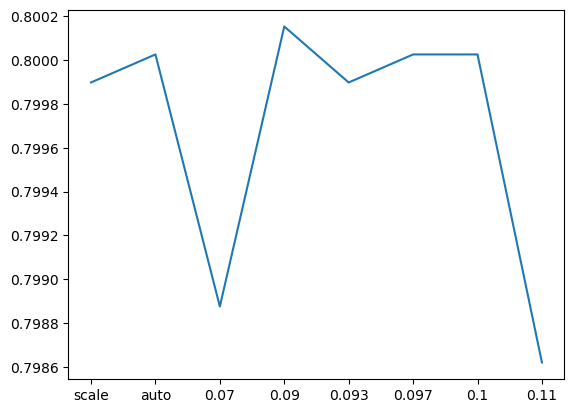

In [12]:
val_score = []
tab =['scale','auto', 0.07, 0.09, 0.093, 0.097, 0.1, 0.11] 
for g in tab:
    score = cross_val_score(SVC(gamma=g), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre gamma", g, ": ",score)
    val_score.append(score)

plt.plot(tab, val_score)


En deux parties pour étudier plus précisément les variations.

Le meilleur paramètre semble être autour de 0.09.

### Degree

Score pour le paramètre Degree 0 :  0.7998978288633461
Score pour le paramètre Degree 1 :  0.7998978288633461
Score pour le paramètre Degree 2 :  0.7998978288633461
Score pour le paramètre Degree 3 :  0.7998978288633461
Score pour le paramètre Degree 4 :  0.7998978288633461
Score pour le paramètre Degree 5 :  0.7998978288633461
Score pour le paramètre Degree 6 :  0.7998978288633461


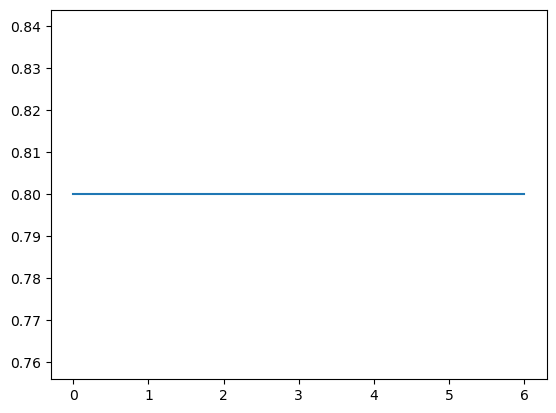

In [13]:
val_score = []
tab =[0, 1, 2, 3, 4, 5, 6] 
for D in tab:
    score = cross_val_score(SVC(degree=D), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre Degree", D, ": ",score)
    val_score.append(score)

plt.plot(tab, val_score)

Pas d'évolution en fonction de la variation du paramètre.

### class weight

Score pour le paramètre class_weight None :  0.7998978288633461
Score pour le paramètre class_weight balanced :  0.7881411300029787


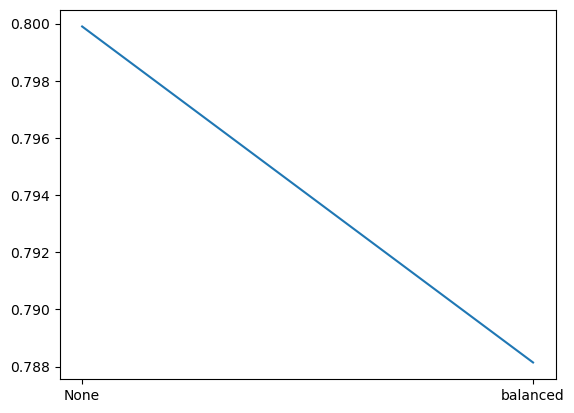

In [15]:
val_score = []
tab =[None, 'balanced'] 
for cw in tab:
    score = cross_val_score(SVC(class_weight=cw), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre class_weight", cw, ": ",score.mean())
    val_score.append(score)

plt.plot(['None', 'balanced'], val_score)

Mieux en Paramètres par défaut !

## 2. Evaluation de la qualité du modèle avec les paramètres choisis

In [3]:
SVM_model = SVC(gamma=0.09)
SVM_model.fit(X_train, Y_train)
print("modele entrainé")

modele entrainé


### Accuracy

In [10]:
predictions = SVM_model.predict(X_test)

res = pd.Series(predictions)
res.value_counts()

False    1164
True      793
Name: count, dtype: int64

In [11]:
accuracy = accuracy_score(Y_test, predictions)
print(f'Accuracy : {accuracy:.4f}')

Accuracy : 0.7961


### Classification report

In [12]:
report = classification_report(Y_test, predictions)
print('Classification Report y_test et predictions pour svm :\n', report)

Classification Report y_test et predictions pour svm :
               precision    recall  f1-score   support

       False       0.83      0.83      0.83      1165
        True       0.75      0.75      0.75       792

    accuracy                           0.80      1957
   macro avg       0.79      0.79      0.79      1957
weighted avg       0.80      0.80      0.80      1957



### Confusion Matrix

In [13]:
conf_matrix = confusion_matrix(Y_test, predictions)
print('Confusion Matrix Y_test et predictions pour SVM :\n', conf_matrix)

Confusion Matrix Y_test et predictions pour SVM :
 [[965 200]
 [199 593]]


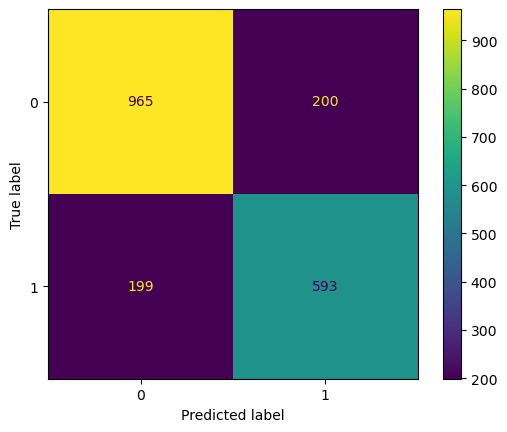

In [14]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

## 3. Gridsearch

5 min pour le faire tourner avec 1% dataset.

In [4]:
nb_plis=5
# kf = KFold(n_splits=nb_plis, shuffle=True, random_state=42)

param_grid = {'C' : np.arange(0.5, 2, 0.5),
    'kernel': ['rbf', 'poly'],
    'gamma' : np.arange(0.8, 1.0, 0.05),
}
grid = GridSearchCV(SVC(), param_grid, cv=5)

# grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=kf)
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([0.5, 1. , 1.5]),
                         'gamma': array([0.8 , 0.85, 0.9 , 0.95]),
                         'kernel': ['rbf', 'poly']})

In [5]:
print("best score : ",grid.best_score_)

print("best parameters : ", grid.best_params_)

best score :  0.753170312115999
best parameters :  {'C': 1.0, 'gamma': 0.8, 'kernel': 'rbf'}


In [6]:
Best_SVM = grid.best_estimator_

In [7]:
Best_SVM.score(X_test, Y_test)

0.7423469387755102

## 4. Evaluation de la qualité du modèle avec les meilleurs hyperparamètres

### Accuracy

In [8]:
Best_predictions = Best_SVM.predict(X_test)

Best_res = pd.Series(Best_predictions)
Best_res.value_counts()

False    256
True     136
Name: count, dtype: int64

In [9]:
Best_accuracy = accuracy_score(Y_test, Best_predictions)
print(f'Accuracy : {Best_accuracy:.4f}')

Accuracy : 0.7423


### Classification report

In [10]:
Best_report = classification_report(Y_test, Best_predictions)
print('Classification Report y_test et predictions pour SVM :\n', Best_report)

Classification Report y_test et predictions en svm:
               precision    recall  f1-score   support

       False       0.73      0.86      0.79       217
        True       0.77      0.60      0.68       175

    accuracy                           0.74       392
   macro avg       0.75      0.73      0.73       392
weighted avg       0.75      0.74      0.74       392



### Confusion Matrix

In [11]:
conf_matrix = confusion_matrix(Y_test, Best_predictions)
print('Confusion Matrix Y_test et predictions pour SVM :\n', conf_matrix)

Confusion Matrix Y_test et predictions en svm :
 [[186  31]
 [ 70 105]]


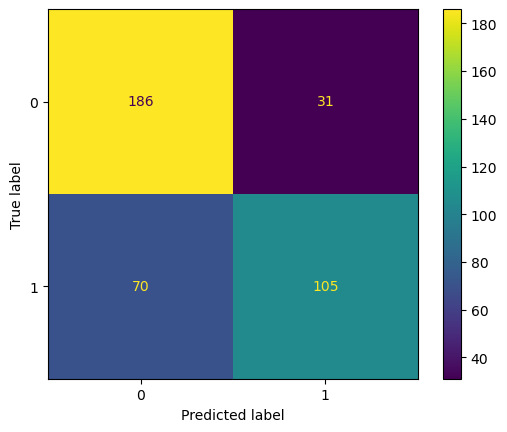

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Projection sur les données du Nevada et du Colorado

## 1. Nevada

In [12]:
# Load data
csv_featuresNE = "./Dataset/acsincome_ne_allfeaturesTP2.csv"
csv_labelsNE = "./Dataset/acsincome_ne_labelTP2.csv"
featuresNE = pd.read_csv(csv_featuresNE)
labelsNE = pd.read_csv(csv_labelsNE)

# Separating features and labels, shuffling
Xne_all = featuresNE
Yne_all = labelsNE
Xne_all,Yne_all = shuffle(Xne_all,Yne_all, random_state=0)

# Only use first N samples to limit training time
sample = 1
num_samples = int(len(Xne_all)*sample)
Xne,Yne = Xne_all[:num_samples], Yne_all[:num_samples]

# Scaler for data standardization
scaler = StandardScaler()

# Separate train and test sets
Xne_train, Xne_test, Yne_train, Yne_test = train_test_split(Xne,Yne, random_state=0, train_size=0.8)
Xne_train = scaler.fit_transform(Xne_train) 
Xne_test = scaler.fit_transform(Xne_test)

Pas de réentrainement des modèles, on récupère le modèle entraîné (**SVM_model**) avec les données de Californie pour appliquer le modèle aux données du Nevada et voir si cela peut permettre d'avoir de bons résultats de prédictions.

In [13]:
print("taille du dataset pour le Nevada : ", featuresNE.shape)

print("Répartition des résultats au Nevada : ", labelsNE.value_counts())

taille du dataset pour le Nevada :  (10785, 10)
Répartition des résultats au Nevada :  PINCP
0        7417
1        3368
Name: count, dtype: int64


On travaille sur 100% des données disponibles pour le Nevada car le dataset est sensiblement plus petit.

### Accuracy

In [18]:
predictionsNE = SVM_model.predict(Xne_test)

res = pd.Series(predictionsNE)
res.value_counts()

False    1221
True      936
Name: count, dtype: int64

In [19]:
accuracy = accuracy_score(Yne_test, predictionsNE)
print(f'Accuracy : {accuracy:.4f}')

Accuracy : 0.7654


### Classification report

In [20]:
report = classification_report(Yne_test, predictionsNE)
print('Classification Report y_test et predictions pour svm :\n', report)

Classification Report y_test et predictions pour svm :
               precision    recall  f1-score   support

           0       0.89      0.74      0.81      1465
           1       0.60      0.81      0.69       692

    accuracy                           0.77      2157
   macro avg       0.75      0.78      0.75      2157
weighted avg       0.80      0.77      0.77      2157



### Confusion Matrix

In [21]:
conf_matrix = confusion_matrix(Yne_test, predictionsNE)
print('Confusion Matrix Y_test et predictions pour SVM :\n', conf_matrix)

Confusion Matrix Y_test et predictions pour SVM :
 [[1090  375]
 [ 131  561]]


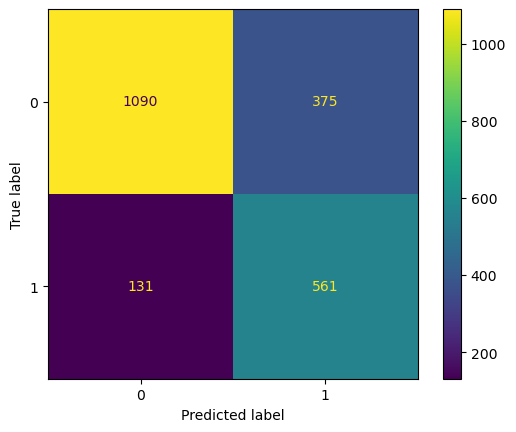

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

## 2. Colorado

In [25]:
# Load data
csv_featuresCO = "./Dataset/acsincome_co_allfeaturesTP2.csv"
csv_labelsCO = "./Dataset/acsincome_co_labelTP2.csv"
featuresCO = pd.read_csv(csv_featuresCO)
labelsCO = pd.read_csv(csv_labelsCO)

# Separating features and labels, shuffling
Xco_all = featuresCO
Yco_all = labelsCO
Xco_all,Yco_all = shuffle(Xco_all,Yco_all, random_state=0)

# Only use first N samples to limit training time
sample = 1
num_samples = int(len(Xco_all)*sample)
Xco,Yco = Xco_all[:num_samples], Yco_all[:num_samples]

# Scaler for data standardization
scaler = StandardScaler()

# Separate train and test sets
Xco_train, Xco_test, Yco_train, Yco_test = train_test_split(Xco,Yco, random_state=0, train_size=0.8)
Xco_train = scaler.fit_transform(Xco_train) 
Xco_test = scaler.fit_transform(Xco_test)

Pas de réentrainement des modèles, on récupère le modèle entraîné (**SVM_model**) avec les données de Californie pour appliquer le modèle aux données du Colorado et voir si cela peut permettre d'avoir de bons résultats de prédictions.

In [26]:
print("taille du dataset pour le Nevada : ", featuresCO.shape)

print("Répartition des résultats au Nevada : ", labelsCO.value_counts())

taille du dataset pour le Nevada :  (31306, 10)
Répartition des résultats au Nevada :  PINCP
0        18334
1        12972
Name: count, dtype: int64


On travaille sur 100% des données disponibles pour le Colorado car le dataset est sensiblement plus petit.

### Accuracy

In [27]:
predictionsCO = SVM_model.predict(Xco_test)

res = pd.Series(predictionsCO)
res.value_counts()

False    3540
True     2722
Name: count, dtype: int64

In [28]:
accuracy = accuracy_score(Yco_test, predictionsCO)
print(f'Accuracy : {accuracy:.4f}')

Accuracy : 0.7763


### Classification report

In [29]:
report = classification_report(Yco_test, predictionsCO)
print('Classification Report y_test et predictions pour svm :\n', report)

Classification Report y_test et predictions pour svm :
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      3719
           1       0.71      0.76      0.73      2543

    accuracy                           0.78      6262
   macro avg       0.77      0.77      0.77      6262
weighted avg       0.78      0.78      0.78      6262



### Confusion Matrix

In [30]:
conf_matrix = confusion_matrix(Yco_test, predictionsCO)
print('Confusion Matrix Y_test et predictions pour SVM :\n', conf_matrix)

Confusion Matrix Y_test et predictions pour SVM :
 [[2929  790]
 [ 611 1932]]


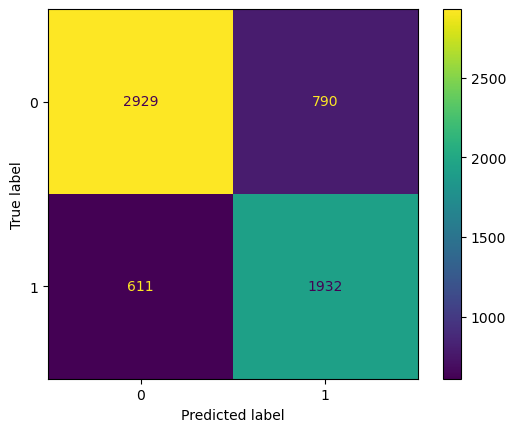

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()